In [44]:
# # For Data reading 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns


# For Feature Scaling & Feature Importance
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import ExtraTreesRegressor

# For model building & scoreing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score


# others
import warnings
warnings.filterwarnings('ignore')

#### Read Dataset

In [45]:
train_df = pd.read_csv('../input/av-healthcare-analytics-ii/healthcare/train_data.csv')
test_df = pd.read_csv('../input/av-healthcare-analytics-ii/healthcare/test_data.csv')
train_dict = pd.read_csv('../input/av-healthcare-analytics-ii/healthcare/train_data_dictionary.csv')

#### Let's Encoded dependent Feature ("Stay" column)

In [46]:
# Let's find unique values of dependent feature
train_df["Stay"].unique()

array(['0-10', '41-50', '31-40', '11-20', '51-60', '21-30', '71-80',
       'More than 100 Days', '81-90', '61-70', '91-100'], dtype=object)

In [48]:
# Let's create a dictionary for dependent feature
encode = {
    '0-10' : 1, '11-20' : 2, '21-30' : 3, '31-40' : 4, '41-50' : 5, '51-60' : 6, '61-70' : 7, '71-80' : 8,
    '81-90' : 9, '91-100' : 10, 'More than 100 Days' : 11
}
train_df['Stay'] = train_df['Stay'].map(encode)

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,1
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,5
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,4
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,5
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,5


### Handle Missing value of features

In [49]:
# Let's check missing values
print('Train Dataset:::::::::::::::')
print(train_df.isnull().sum())
print("=========================================")
print('Test Dataset::::::::::::::::')
print(test_df.isnull().sum())

Train Dataset:::::::::::::::
case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                             113
patientid                               0
City_Code_Patient                    4532
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
dtype: int64
Test Dataset::::::::::::::::
case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospi

In [50]:
# Find features of missing values 
def NaNFeature(df):
    nan_feature = [n for n in df.columns if df[n].isnull().sum()>=1]
    return nan_feature

In [51]:
# Let's fill missing values of train detaset 
nan_features_train = NaNFeature(train_df)
for fillnan in nan_features_train:
    train_df[fillnan].fillna(train_df[fillnan].mode()[0], inplace=True)

In [52]:
# Let's fill missing values of test detaset 
nan_features_test = NaNFeature(test_df)
for fillnan in nan_features_test:
    test_df[fillnan].fillna(test_df[fillnan].mode()[0], inplace=True)

In [53]:
# Lets check missing values percentage
print('Train Dataset:::::::::::::::')
print(np.round(train_df.isnull().sum() * 100 / len(train_df), 4))
print("=========================================")
print('Test Dataset:::::::::::::::')
print(np.round(test_df.isnull().sum() * 100 / len(test_df), 4))

Train Dataset:::::::::::::::
case_id                              0.0
Hospital_code                        0.0
Hospital_type_code                   0.0
City_Code_Hospital                   0.0
Hospital_region_code                 0.0
Available Extra Rooms in Hospital    0.0
Department                           0.0
Ward_Type                            0.0
Ward_Facility_Code                   0.0
Bed Grade                            0.0
patientid                            0.0
City_Code_Patient                    0.0
Type of Admission                    0.0
Severity of Illness                  0.0
Visitors with Patient                0.0
Age                                  0.0
Admission_Deposit                    0.0
Stay                                 0.0
dtype: float64
Test Dataset:::::::::::::::
case_id                              0.0
Hospital_code                        0.0
Hospital_type_code                   0.0
City_Code_Hospital                   0.0
Hospital_region_code      

### Handle Categorical Features

In [54]:
# Let's Find out categorical features through a function
def CatFeatures(df):
    features = [feature for feature in df.columns if df[feature].dtypes == "O"]
    return features

In [55]:
# categorical features of train dataset
cat_features_train = CatFeatures(train_df)
cat_features_train

['Hospital_type_code',
 'Hospital_region_code',
 'Department',
 'Ward_Type',
 'Ward_Facility_Code',
 'Type of Admission',
 'Severity of Illness',
 'Age']

In [56]:
# Let's check unique value of categorical features of train data
for i in cat_features_train:
    print(train_df[i].unique())

['c' 'e' 'b' 'a' 'f' 'd' 'g']
['Z' 'X' 'Y']
['radiotherapy' 'anesthesia' 'gynecology' 'TB & Chest disease' 'surgery']
['R' 'S' 'Q' 'P' 'T' 'U']
['F' 'E' 'D' 'B' 'A' 'C']
['Emergency' 'Trauma' 'Urgent']
['Extreme' 'Moderate' 'Minor']
['51-60' '71-80' '31-40' '41-50' '81-90' '61-70' '21-30' '11-20' '0-10'
 '91-100']


In [57]:
# categorical features of test dataset
cat_features_test = CatFeatures(test_df)
cat_features_test

['Hospital_type_code',
 'Hospital_region_code',
 'Department',
 'Ward_Type',
 'Ward_Facility_Code',
 'Type of Admission',
 'Severity of Illness',
 'Age']

In [58]:
# Let's check unique value of categorical features of test data
for i in cat_features_test:
    print(test_df[i].unique())

['c' 'a' 'b' 'e' 'f' 'd' 'g']
['Z' 'X' 'Y']
['gynecology' 'anesthesia' 'TB & Chest disease' 'radiotherapy' 'surgery']
['S' 'Q' 'R' 'P' 'T' 'U']
['A' 'F' 'D' 'E' 'C' 'B']
['Emergency' 'Trauma' 'Urgent']
['Moderate' 'Extreme' 'Minor']
['71-80' '31-40' '51-60' '41-50' '11-20' '61-70' '21-30' '81-90' '0-10'
 '91-100']


In [59]:
# # Let's create a function to handle categorical features 
def CatToNumaric():
    # Handle categorical feature of train dataset
    for n in cat_features_train:
        num_data = dict(zip(train_df[n].unique(), range(len(train_df[n].unique()))))
        train_df[n] = train_df[n].map(num_data) # or train_df[n].replace(num_data, inplace=True)
        
    # Handle categorical features of test dataset
    for n in cat_features_test:
        num_data = dict(zip(test_df[n].unique(), range(len(test_df[n].unique()))))
        test_df[n] = test_df[n].map(num_data) # or test_df[n].replace(num_data, inplace=True)

In [60]:
# Let's check features data types
CatToNumaric()
print('Train Dataset:::::::::::::::')
print(train_df.dtypes)
print("=====================================")
print('Test Dataset:::::::::::::::')
print(test_df.dtypes)

Train Dataset:::::::::::::::
case_id                                int64
Hospital_code                          int64
Hospital_type_code                     int64
City_Code_Hospital                     int64
Hospital_region_code                   int64
Available Extra Rooms in Hospital      int64
Department                             int64
Ward_Type                              int64
Ward_Facility_Code                     int64
Bed Grade                            float64
patientid                              int64
City_Code_Patient                    float64
Type of Admission                      int64
Severity of Illness                    int64
Visitors with Patient                  int64
Age                                    int64
Admission_Deposit                    float64
Stay                                   int64
dtype: object
Test Dataset:::::::::::::::
case_id                                int64
Hospital_code                          int64
Hospital_type_code           

#### Clean unused features

In [61]:
# Let's see the train dictionary data to drop un necessary features
train_dict

,Column,Description
0,case_id,Case_ID registered in Hospital
1,Hospital_code,Unique code for the Hospital
2,Hospital_type_code,Unique code for the type of Hospital
3,City_Code_Hospital,City Code of the Hospital
4,Hospital_region_code,Region Code of the Hospital
5,Available Extra Rooms in Hospital,Number of Extra rooms available in the Hospital
6,Department,Department overlooking the case
7,Ward_Type,Code for the Ward type
8,Ward_Facility_Code,Code for the Ward Facility
9,Bed Grade,Condition of Bed in the Ward


In [62]:
# Lets drop features those are not necessary so much
def DropFeatures(df):
    drop_features = {'case_id', 'Hospital_code', 'Hospital_type_code', 'patientid'}
    df.drop(drop_features, axis=1, inplace=True)
    return df

In [63]:
# Show train dataset
train_data = DropFeatures(train_df)
train_data.head()

,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,3,0,3,0,0,0,2.0,7.0,0,0,2,0,4911.0,1
1,5,0,2,0,1,0,2.0,7.0,1,0,2,0,5954.0,5
2,1,1,2,1,1,1,2.0,7.0,1,0,2,0,4745.0,4
3,2,2,2,0,0,2,2.0,7.0,1,0,2,0,7272.0,5
4,2,2,2,0,1,2,2.0,7.0,1,0,2,0,5558.0,5


In [64]:
# Show test dataset
test_data = DropFeatures(test_df)
test_data.head()

,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit
0,3,0,3,0,0,0,2.0,2.0,0,0,2,0,3095.0
1,4,1,2,0,0,1,2.0,2.0,1,0,4,0,4018.0
2,2,2,3,0,1,2,4.0,2.0,0,0,3,0,4492.0
3,6,1,3,0,1,1,2.0,2.0,1,0,3,0,4173.0
4,11,1,2,0,2,1,2.0,2.0,1,0,4,0,4161.0


### Feature Scaling (MinMax Scaler)

In [65]:
# create X_train & X_test for feature scaling 
X_train = train_data.iloc[: , :-1]
X_test = test_data

# y_train (depended feature)
y_train = train_data.iloc[: , -1]

In [66]:
# create function for scaling X_ data 
def FeatureScaler(df):
    min_max = MinMaxScaler()
    df = pd.DataFrame(min_max.fit_transform(df), columns=df.columns)
    return df

In [67]:
# Let's show final train dataset
X_train_final = FeatureScaler(X_train)
X_train_final.head()

,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit
0,0.166667,0.0,0.125000,0.00,0.0,0.0,0.333333,0.162162,0.0,0.0,0.0625,0.0,0.337858
1,0.333333,0.0,0.083333,0.00,0.2,0.0,0.333333,0.162162,0.5,0.0,0.0625,0.0,0.451129
2,0.000000,0.5,0.083333,0.25,0.2,0.2,0.333333,0.162162,0.5,0.0,0.0625,0.0,0.319831
3,0.083333,1.0,0.083333,0.00,0.0,0.4,0.333333,0.162162,0.5,0.0,0.0625,0.0,0.594266
4,0.083333,1.0,0.083333,0.00,0.2,0.4,0.333333,0.162162,0.5,0.0,0.0625,0.0,0.408123


In [68]:
# Let's show final test dataset
X_test_final = FeatureScaler(X_test)
X_test_final.head()

,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit
0,0.166667,0.0,0.142857,0.0,0.0,0.0,0.333333,0.027027,0.0,0.0,0.06250,0.0,0.127964
1,0.250000,0.5,0.095238,0.0,0.0,0.2,0.333333,0.027027,0.5,0.0,0.12500,0.0,0.219170
2,0.083333,1.0,0.142857,0.0,0.2,0.4,1.000000,0.027027,0.0,0.0,0.09375,0.0,0.266008
3,0.416667,0.5,0.142857,0.0,0.2,0.2,0.333333,0.027027,0.5,0.0,0.09375,0.0,0.234486
4,0.833333,0.5,0.095238,0.0,0.4,0.2,0.333333,0.027027,0.5,0.0,0.12500,0.0,0.233300


### Find Feature Importance
    Find best 10 features from datasets

In [69]:
# Let's call Extra Trees Regressor function
feature_imp = ExtraTreesRegressor()
feature_imp.fit(X_train_final, y_train)
# Let's show the list of feature importance
feature_imp.feature_importances_

array([0.02598812, 0.01332825, 0.0617236 , 0.03196891, 0.09295774,
       0.01958209, 0.03680689, 0.08620944, 0.0194372 , 0.01708553,
       0.33590379, 0.08373284, 0.17527558])

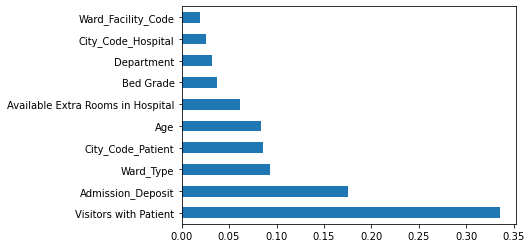

In [70]:
# Let's show a plot of ten (10) features
feature_importance = pd.Series(feature_imp.feature_importances_, index=X_train_final.columns)
feature_importance.nlargest(10).plot(kind='barh')
plt.show()

### Create Model with Random Forest Classifier

In [71]:
# Create model
stay_predict = RandomForestClassifier()
stay_predict.fit(X_train_final, y_train)

RandomForestClassifier()

#### Model Testing

In [ ]:
# Let's test the model
y_test = stay_predict.predict(X_test_final)
y_test

In [ ]:
# For submission file we need 'case_id' so read sample_submission file
sample_sub_df = test_df = pd.read_csv('../input/av-healthcare-analytics-ii/healthcare/sample_sub.csv')

#### Decode Prediction data

In [ ]:
predection_df = pd.DataFrame()
predection_df['case_id'] = sample_sub_df['case_id'] 
predection_df['Stay'] = y_test

decode_prediction = { 1 : '0-10', 2 : '11-20', 3 : '21-30', 4 : '31-40', 5 : '41-50', 6 : '51-60', 7 : '61-70'
            ,8 : '71-80', 9 : '81-90', 10 : '91-100', 11 : 'More than 100 Days'}

predection_df['Stay'] = predection_df['Stay'].map(decode_prediction)
predection_df.head()

### Scoring & Validation

In [ ]:
# Model score
stay_predict.score(X_train_final, y_train)

In [ ]:
# Cross Validation 
score = cross_val_score(stay_predict, X_train_final, y_train.ravel(), cv=10)
score.mean()

#### Create a submission File

In [ ]:
submission = predection_df.copy()
submission.head()

#### Thanks
Wish to get comments from all.

Source Code on github-  https://github.com/sheikhmasudrana/ML_Practice/tree/master/Healthcare%20Analytics(stay%20days%20prediction)